In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

In [21]:
df_hrp = pd.read_csv('../results/hrp.csv')
df_cvar = pd.read_csv('../results/cvar.csv')

djia_init = df_hrp['DJIA'][0]

In [22]:
print(df_hrp.head())
print(df_cvar.head())

         Date  Portfolio Progression          DJIA
0  2022-01-03           36585.058594  36585.058594
1  2022-01-04           36615.807103  36799.648438
2  2022-01-05           36177.235141  36407.109375
3  2022-01-06           36025.285573  36236.468750
4  2022-01-07           35813.884663  36231.660156
         Date  Portfolio Progression          DJIA
0  2022-01-03           36585.058594  36585.058594
1  2022-01-04           36961.077975  36799.648438
2  2022-01-05           36459.718800  36407.109375
3  2022-01-06           36327.215507  36236.468750
4  2022-01-07           35239.435964  36231.660156


In [23]:
df_ensemble = pd.read_csv('../results/result_ensemble.csv')
df_ensemble.head()

factor = df_ensemble['dji'][0]/djia_init

df_ensemble['dji'] = df_ensemble['dji']/factor
df_ensemble['ensemble'] = df_ensemble['ensemble']/factor

df_ensemble.head()

last_date = df_ensemble['date'].iloc[0]

num_days = len(df_ensemble['date'])

df_ensemble.head()


,date,ensemble,dji
0,2022-01-03,36585.058594,36585.058594
1,2022-01-04,36683.410755,36799.648438
2,2022-01-05,36715.071543,36407.109375
3,2022-01-06,36667.083777,36236.468750
4,2022-01-07,36770.511087,36231.660156


In [24]:
df_ddpg = pd.read_csv('../results/result_ddpg.csv')
df_ddpg.head()

factor = df_ddpg['dji'][0]/djia_init

df_ddpg['dji'] = df_ddpg['dji']/factor
df_ddpg['ensemble'] = df_ddpg['ensemble']/factor

df_ddpg.head()

,date,ensemble,dji
0,2022-01-03,36585.058594,36585.058594
1,2022-01-04,36639.356462,36799.648438
2,2022-01-05,36547.357335,36407.109375
3,2022-01-06,36404.231540,36236.468750
4,2022-01-07,36235.349464,36231.660156


In [25]:
df_a2c = pd.read_csv('../results/result_a2c.csv')
df_a2c.head()

factor = df_a2c['dji'][0]/djia_init

df_a2c['dji'] = df_a2c['dji']/factor
df_a2c['ensemble'] = df_a2c['ensemble']/factor

df_a2c.head()

,date,ensemble,dji
0,2022-01-03,36585.058594,36585.058594
1,2022-01-04,36665.690168,36799.648438
2,2022-01-05,36516.687610,36407.109375
3,2022-01-06,36485.492146,36236.468750
4,2022-01-07,36476.462534,36231.660156


In [26]:
df_ppo = pd.read_csv('../results/result_ppo.csv')
df_ppo.head()

factor = df_ppo['dji'][0]/djia_init

df_ppo['dji'] = df_ppo['dji']/factor
df_ppo['ensemble'] = df_ppo['ensemble']/factor

df_ppo.head()

,date,ensemble,dji
0,2022-01-03,36585.058594,36585.058594
1,2022-01-04,36596.543724,36799.648438
2,2022-01-05,36342.677795,36407.109375
3,2022-01-06,36124.634385,36236.468750
4,2022-01-07,36043.880579,36231.660156


In [27]:
# Normalized dfs

print(df_hrp.head())
print(df_cvar.head())
print(df_ensemble.head())
print(df_ddpg.head())
print(df_a2c.head())
print(df_ppo.head())

         Date  Portfolio Progression          DJIA
0  2022-01-03           36585.058594  36585.058594
1  2022-01-04           36615.807103  36799.648438
2  2022-01-05           36177.235141  36407.109375
3  2022-01-06           36025.285573  36236.468750
4  2022-01-07           35813.884663  36231.660156
         Date  Portfolio Progression          DJIA
0  2022-01-03           36585.058594  36585.058594
1  2022-01-04           36961.077975  36799.648438
2  2022-01-05           36459.718800  36407.109375
3  2022-01-06           36327.215507  36236.468750
4  2022-01-07           35239.435964  36231.660156
         date      ensemble           dji
0  2022-01-03  36585.058594  36585.058594
1  2022-01-04  36683.410755  36799.648438
2  2022-01-05  36715.071543  36407.109375
3  2022-01-06  36667.083777  36236.468750
4  2022-01-07  36770.511087  36231.660156
         date      ensemble           dji
0  2022-01-03  36585.058594  36585.058594
1  2022-01-04  36639.356462  36799.648438
2  2022-01

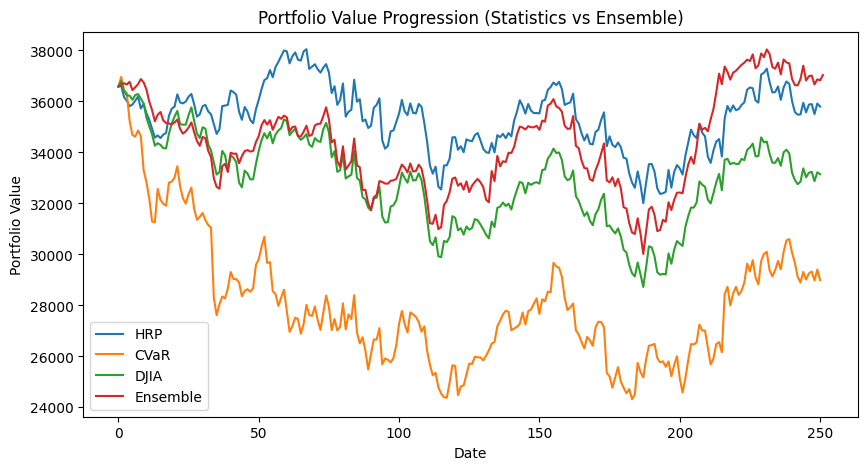

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

date = range(len(df_hrp['Date']))
date_ = range(len(df_ensemble['date']))
ax.plot(date, df_hrp['Portfolio Progression'], label='HRP')
ax.plot(date, df_cvar['Portfolio Progression'], label='CVaR')
ax.plot(date, df_hrp['DJIA'], label='DJIA')
ax.plot(date_, df_ensemble['ensemble'], label='Ensemble')

ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.set_title('Portfolio Value Progression (Statistics vs Ensemble)')
ax.legend()

plt.savefig('../plots/statistics_ensemble.png')
plt.show()


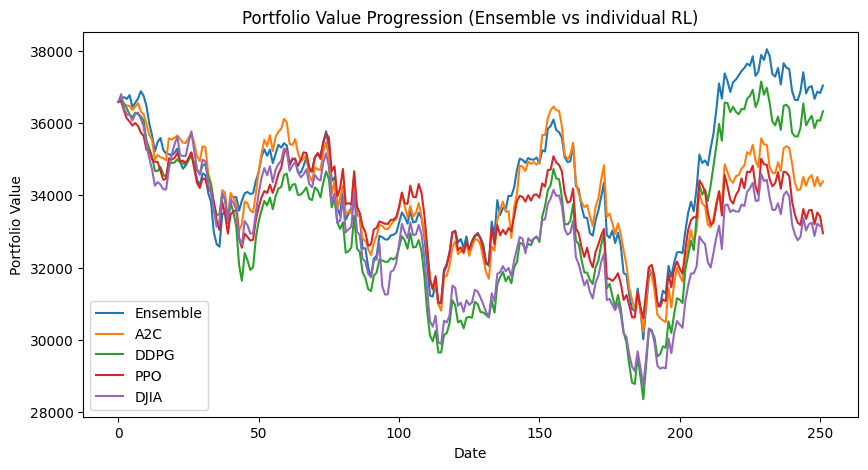

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

date = range(len(df_hrp['Date']))
date_ = range(len(df_ensemble['date']))
ax.plot(date_, df_ensemble['ensemble'], label='Ensemble')
ax.plot(date_, df_a2c['ensemble'], label='A2C')
ax.plot(date_, df_ddpg['ensemble'], label='DDPG')
ax.plot(date_, df_ppo['ensemble'], label='PPO')
ax.plot(date, df_hrp['DJIA'], label='DJIA')

ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.set_title('Portfolio Value Progression (Ensemble vs individual RL)')
ax.legend()
plt.savefig('../plots/ensemble_rl.png')
plt.show()